In [1]:
%matplotlib inline
import pandas as pd
from dateutil.parser import parse

df = pd.read_csv("future-sales-data/sales_train.csv", parse_dates=['date'])
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_month,item_category_id
0,2013-01-01,0,0,32,221.0,4.0,40
1,2013-01-01,0,1,32,221.0,3.0,40
2,2013-01-01,0,3,32,349.0,2.0,40
3,2013-01-01,0,4,32,349.0,1.0,40
4,2013-01-01,0,5,32,349.0,2.0,40
...,...,...,...,...,...,...,...
1766433,2015-10-01,33,55,12733,1490.0,2.0,76
1766434,2015-10-01,33,55,13092,2000.0,1.0,36
1766435,2015-10-01,33,55,18060,172.0,1.0,44
1766436,2015-10-01,33,57,15925,11899.0,1.0,72


In [11]:
def getItemData(df, shopId, itemId):
    return df.loc[(df['shop_id'] == shopId) & (df['item_id'] == itemId)]

def plotItemData(df, shopId, itemId):
    getItemData(df, shopId, itemId).plot(x='date_block_num', y='item_cnt_day')
    
getItemData(df, 59, 22087)

,shop_id,item_id,date,item_price,item_cnt_day
date_block_num,,,,,
0,59,22087,03.01.2013,79.000000,9.0
1,59,22087,09.02.2013,79.000000,1.0
2,59,22087,06.03.2013,79.000000,6.0
4,59,22087,25.05.2013,79.000000,2.0
5,59,22087,02.06.2013,79.000000,17.0
6,59,22087,07.07.2013,79.000000,12.0
7,59,22087,14.08.2013,79.000000,7.0
8,59,22087,12.09.2013,79.000000,10.0
9,59,22087,14.10.2013,79.000000,5.0


In [2]:
series = pd.date_range(start='2013-01-01', periods=36, freq='M').map(lambda d: d.replace(day=1))

def fillZeros(df, series):
    df = df.reindex(series)
    df['date_block_num'] = (df.index.map(lambda d: (d.year-2013)*12+d.month-1))
    if 'shop_id' in df:
        df['shop_id'] = df['shop_id'].fillna(method='ffill').fillna(method='bfill')
    if 'item_id' in df:
        df['item_id'] = df['item_id'].fillna(method='ffill').fillna(method='bfill')
    if 'item_category_id' in df:
        df['item_category_id'] = df['item_category_id'].fillna(method='ffill').fillna(method='bfill')
    if 'item_price' in df:
        df['item_price'] = df['item_price'].fillna(method='ffill').fillna(method='bfill')
    df['item_cnt_month'] = df['item_cnt_month'].fillna(0)
    return df

def getShopItemData(df, shopId, itemId):
    ans = df.loc[(df['shop_id'] == shopId) & (df['item_id'] == itemId)].set_index('date')
    return fillZeros(ans, series)

def getItemData(df, itemId):
    df_item = df.groupby(['date', 'date_block_num', 'item_id', 'item_category_id']).agg({"item_price": "mean", "item_cnt_month": "sum"}).reset_index()
    ans = df_item.loc[(df_item['item_id'] == itemId)].set_index('date')
    return fillZeros(ans, series)

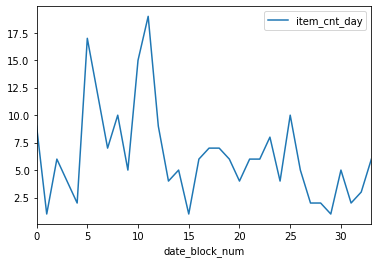

In [41]:
plotItemData(df, 59, 22087)

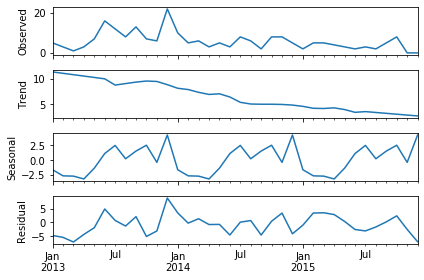

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
local_df= getShopItemData(df,59,22087)
local_df
result_add = seasonal_decompose(local_df['item_cnt_month'], model='additive', extrapolate_trend='freq', freq=12)
ax = result_add.plot()

In [18]:
result_add.trend

2013-01-01    11.363394
2013-02-01    11.093871
2013-03-01    10.824349
2013-04-01    10.554827
2013-05-01    10.285305
2013-06-01    10.015783
2013-07-01     8.791667
2013-08-01     9.083333
2013-09-01     9.375000
2013-10-01     9.583333
2013-11-01     9.500000
2013-12-01     8.875000
2014-01-01     8.166667
2014-02-01     7.916667
2014-03-01     7.375000
2014-04-01     6.958333
2014-05-01     7.083333
2014-06-01     6.458333
2014-07-01     5.416667
2014-08-01     5.083333
2014-09-01     5.041667
2014-10-01     5.041667
2014-11-01     5.000000
2014-12-01     4.875000
2015-01-01     4.625000
2015-02-01     4.250000
2015-03-01     4.208333
2015-04-01     4.333333
2015-05-01     4.000000
2015-06-01     3.458333
2015-07-01     3.595814
2015-08-01     3.427108
2015-09-01     3.258401
2015-10-01     3.089695
2015-11-01     2.920989
2015-12-01     2.752282
Name: item_cnt_month, dtype: float64